# Analyze the latest feature releases

***

## Project Description

Two pieces of data that would be helpful immediately: the number of daily active users, the number of status changes by card (daily).

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import datetime
from datetime import datetime, timedelta
import scipy.stats

import sqlite3

#import mysql.connector (#pip install mysql-connector-python)

#import ibm_db
#import ibm_db_dbi

#import pyodbc

#from pymongo import MongoClient

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Load Data from SQL database

### SQLite

In [2]:
db = sqlite3.connect("shiptivity.db") #Create connection

In [3]:
cursor = db.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_schema\
                WHERE \
                type ='table' AND\
                name NOT LIKE 'sqlite_%';")
available_table=(cursor.fetchall())

In [5]:
available_table

[('user',), ('login_history',), ('card',), ('card_change_history',)]

## Write SQL Queries

In [6]:
pd.read_sql_query("SELECT * FROM user", db)

,id,firstname,lastname
0,1,Dawna,Pellegren
1,2,Tama,Courtois
2,3,Nadene,Otwell
3,4,Genesis,Wible
4,5,Lissa,Braatz
...,...,...,...
95,96,Harvey,Moncrief
96,97,Shirly,Conners
97,98,Lacresha,Dunne
98,99,Elenore,Varley


In [7]:
df2 = pd.read_sql_query("SELECT * FROM login_history", db)
df2

,id,user_id,login_timestamp
0,1,36,1517667588
1,2,6,1517828610
2,3,85,1518062400
3,4,12,1518175184
4,5,6,1518344617
...,...,...,...
4055,4056,46,1549048024
4056,4057,73,1549050664
4057,4058,26,1549058099
4058,4059,23,1549061446


In [8]:
df2['date'] = pd.to_datetime(df2['login_timestamp'],unit='s')

In [9]:
df2

,id,user_id,login_timestamp,date
0,1,36,1517667588,2018-02-03 14:19:48
1,2,6,1517828610,2018-02-05 11:03:30
2,3,85,1518062400,2018-02-08 04:00:00
3,4,12,1518175184,2018-02-09 11:19:44
4,5,6,1518344617,2018-02-11 10:23:37
...,...,...,...,...
4055,4056,46,1549048024,2019-02-01 19:07:04
4056,4057,73,1549050664,2019-02-01 19:51:04
4057,4058,26,1549058099,2019-02-01 21:54:59
4058,4059,23,1549061446,2019-02-01 22:50:46


In [10]:
df2["date_only"] = df2["date"].dt.date

In [11]:
df2["date_only"] = pd.to_datetime(df2["date_only"])

In [12]:
df2

,id,user_id,login_timestamp,date,date_only
0,1,36,1517667588,2018-02-03 14:19:48,2018-02-03
1,2,6,1517828610,2018-02-05 11:03:30,2018-02-05
2,3,85,1518062400,2018-02-08 04:00:00,2018-02-08
3,4,12,1518175184,2018-02-09 11:19:44,2018-02-09
4,5,6,1518344617,2018-02-11 10:23:37,2018-02-11
...,...,...,...,...,...
4055,4056,46,1549048024,2019-02-01 19:07:04,2019-02-01
4056,4057,73,1549050664,2019-02-01 19:51:04,2019-02-01
4057,4058,26,1549058099,2019-02-01 21:54:59,2019-02-01
4058,4059,23,1549061446,2019-02-01 22:50:46,2019-02-01


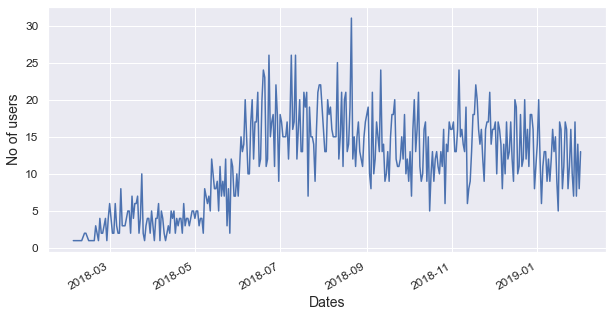

In [13]:
df2.groupby("date_only")["user_id"].count().plot(figsize=(10,5))
plt.xlabel("Dates")
plt.ylabel("No of users")
plt.show()

In [14]:
pd.read_sql_query("SELECT * FROM card", db)

,id,name,status,priority
0,1,Leuschke Group,backlog,1
1,2,"Jacobson, Mertz and Kiehn",backlog,2
2,3,"Carroll, Lindgren and Schoen",complete,3
3,4,"Russel, Wilderman and Mante",backlog,3
4,5,Kunde Group,complete,5
...,...,...,...,...
195,196,"Williamson, Ratke and Weissnat",complete,139
196,197,"Dare, Barton and Weber",backlog,100
197,198,Mitchell-Schoen,complete,141
198,199,Bergstrom-Bruen,backlog,101


In [15]:
df = pd.read_sql_query("SELECT * FROM card_change_history", db)
df

,id,cardID,oldStatus,newStatus,oldPriority,newPriority,timestamp
0,1,1,None,backlog,0,1,1545719521
1,2,2,None,backlog,0,2,1532263781
2,3,3,None,backlog,0,3,1547083910
3,4,4,None,backlog,0,4,1530431160
4,5,5,None,backlog,0,5,1544345250
...,...,...,...,...,...,...,...
481,482,143,in-progress,complete,74,93,1548399582
482,483,98,backlog,in-progress,48,24,1544164392
483,484,60,backlog,in-progress,31,44,1544952588
484,485,28,in-progress,complete,14,51,1544823283


In [16]:
df['date'] = pd.to_datetime(df['timestamp'],unit='s')

In [17]:
df

,id,cardID,oldStatus,newStatus,oldPriority,newPriority,timestamp,date
0,1,1,None,backlog,0,1,1545719521,2018-12-25 06:32:01
1,2,2,None,backlog,0,2,1532263781,2018-07-22 12:49:41
2,3,3,None,backlog,0,3,1547083910,2019-01-10 01:31:50
3,4,4,None,backlog,0,4,1530431160,2018-07-01 07:46:00
4,5,5,None,backlog,0,5,1544345250,2018-12-09 08:47:30
...,...,...,...,...,...,...,...,...
481,482,143,in-progress,complete,74,93,1548399582,2019-01-25 06:59:42
482,483,98,backlog,in-progress,48,24,1544164392,2018-12-07 06:33:12
483,484,60,backlog,in-progress,31,44,1544952588,2018-12-16 09:29:48
484,485,28,in-progress,complete,14,51,1544823283,2018-12-14 21:34:43


In [18]:
df["date_only"] = df["date"].dt.date

In [19]:
df

,id,cardID,oldStatus,newStatus,oldPriority,newPriority,timestamp,date,date_only
0,1,1,None,backlog,0,1,1545719521,2018-12-25 06:32:01,2018-12-25
1,2,2,None,backlog,0,2,1532263781,2018-07-22 12:49:41,2018-07-22
2,3,3,None,backlog,0,3,1547083910,2019-01-10 01:31:50,2019-01-10
3,4,4,None,backlog,0,4,1530431160,2018-07-01 07:46:00,2018-07-01
4,5,5,None,backlog,0,5,1544345250,2018-12-09 08:47:30,2018-12-09
...,...,...,...,...,...,...,...,...,...
481,482,143,in-progress,complete,74,93,1548399582,2019-01-25 06:59:42,2019-01-25
482,483,98,backlog,in-progress,48,24,1544164392,2018-12-07 06:33:12,2018-12-07
483,484,60,backlog,in-progress,31,44,1544952588,2018-12-16 09:29:48,2018-12-16
484,485,28,in-progress,complete,14,51,1544823283,2018-12-14 21:34:43,2018-12-14


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           486 non-null    int64         
 1   cardID       486 non-null    int64         
 2   oldStatus    286 non-null    object        
 3   newStatus    486 non-null    object        
 4   oldPriority  486 non-null    int64         
 5   newPriority  486 non-null    int64         
 6   timestamp    486 non-null    int64         
 7   date         486 non-null    datetime64[ns]
 8   date_only    486 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 34.3+ KB


In [21]:
df["date_only"] = pd.to_datetime(df["date_only"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           486 non-null    int64         
 1   cardID       486 non-null    int64         
 2   oldStatus    286 non-null    object        
 3   newStatus    486 non-null    object        
 4   oldPriority  486 non-null    int64         
 5   newPriority  486 non-null    int64         
 6   timestamp    486 non-null    int64         
 7   date         486 non-null    datetime64[ns]
 8   date_only    486 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 34.3+ KB


In [23]:
df3 = pd.DataFrame(df.groupby("cardID")["oldStatus", "newStatus"].count())
df3

,oldStatus,newStatus
cardID,,
1,0,1
2,2,3
3,2,3
4,0,1
5,2,3
...,...,...
196,2,3
197,0,1
198,2,3


In [24]:
df3.reset_index(inplace=True)

In [25]:
df3

,cardID,oldStatus,newStatus
0,1,0,1
1,2,2,3
2,3,2,3
3,4,0,1
4,5,2,3
...,...,...,...
195,196,2,3
196,197,0,1
197,198,2,3
198,199,2,3


In [26]:
df4 = pd.melt(df3, id_vars="cardID")
df4

,cardID,variable,value
0,1,oldStatus,0
1,2,oldStatus,2
2,3,oldStatus,2
3,4,oldStatus,0
4,5,oldStatus,2
...,...,...,...
395,196,newStatus,3
396,197,newStatus,1
397,198,newStatus,3
398,199,newStatus,3


<Figure size 4320x360 with 0 Axes>

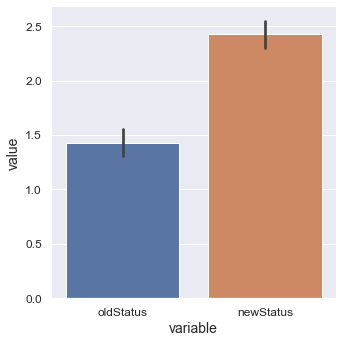

In [27]:
plt.figure(figsize=(60,5))
sns.factorplot(x = 'variable', y='value', data=df4, kind='bar')
plt.show()

In [28]:
cursor.close()

***

#### Python code done by Dennis Lam